# NYC Shootings Cluster Analysis

In [169]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import folium
from datetime import datetime

# Data Collection

In [170]:
ny_sc = pd.read_csv("NYPD_Shooting_Incident_Data__Historic_.csv")
ny_sc

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27307,245029823,05/14/2022,03:02:00,BRONX,OUTSIDE,48,0.0,STREET,(null),False,...,(null),(null),18-24,M,BLACK,1.011526e+06,247828.000000,40.846864,-73.901413,POINT (-73.90141321 40.84686352)
27308,239583450,01/22/2022,13:15:00,MANHATTAN,OUTSIDE,30,0.0,STREET,(null),False,...,F,WHITE HISPANIC,25-44,M,WHITE HISPANIC,9.974580e+05,240485.000000,40.826743,-73.952273,POINT (-73.952273 40.826743)
27309,246825728,06/18/2022,03:29:00,MANHATTAN,OUTSIDE,32,0.0,STREET,(null),False,...,M,BLACK,25-44,M,BLACK,1.000999e+06,234464.000000,40.810209,-73.939496,POINT (-73.9394955 40.81020941)
27310,246876579,06/19/2022,20:08:00,BRONX,INSIDE,46,2.0,HOUSING,MULTI DWELL - PUBLIC HOUS,False,...,M,BLACK,25-44,M,WHITE HISPANIC,1.012980e+06,251028.000000,40.855644,-73.896141,POINT (-73.896141 40.855644)


# Data Preparation

In [171]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(ny_sc.head())

First few rows of the dataset:
   INCIDENT_KEY  OCCUR_DATE OCCUR_TIME    BORO LOC_OF_OCCUR_DESC  PRECINCT  \
0     228798151  05/27/2021   21:30:00  QUEENS               NaN       105   
1     137471050  06/27/2014   17:40:00   BRONX               NaN        40   
2     147998800  11/21/2015   03:56:00  QUEENS               NaN       108   
3     146837977  10/09/2015   18:30:00   BRONX               NaN        44   
4      58921844  02/19/2009   22:58:00   BRONX               NaN        47   

   JURISDICTION_CODE LOC_CLASSFCTN_DESC LOCATION_DESC  \
0                0.0                NaN           NaN   
1                0.0                NaN           NaN   
2                0.0                NaN           NaN   
3                0.0                NaN           NaN   
4                0.0                NaN           NaN   

   STATISTICAL_MURDER_FLAG  ... PERP_SEX PERP_RACE VIC_AGE_GROUP VIC_SEX  \
0                    False  ...      NaN       NaN         18-24       M   
1    

In [172]:
# Summary statistics of numerical features
print("\nSummary statistics of numerical features:")
print(ny_sc.describe())


Summary statistics of numerical features:
       INCIDENT_KEY      PRECINCT  JURISDICTION_CODE    X_COORD_CD  \
count  2.731200e+04  27312.000000       27310.000000  2.731200e+04   
mean   1.208605e+08     65.635362           0.326913  1.009449e+06   
std    7.341286e+07     27.305705           0.737743  1.837783e+04   
min    9.953245e+06      1.000000           0.000000  9.149281e+05   
25%    6.386088e+07     44.000000           0.000000  1.000029e+06   
50%    9.037222e+07     68.000000           0.000000  1.007731e+06   
75%    1.888102e+08     81.000000           0.000000  1.016838e+06   
max    2.611902e+08    123.000000           2.000000  1.066815e+06   

          Y_COORD_CD      Latitude     Longitude  
count   27312.000000  27302.000000  27302.000000  
mean   208127.401608     40.737892    -73.909051  
std     31886.377757      0.087525      0.066272  
min    125756.718750     40.511586    -74.249303  
25%    182834.335938     40.668481    -73.943027  
50%    194486.570312

In [173]:
# Check data types and missing values
print("\nData types and missing values:")
print(ny_sc.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   LOC_OF_OCCUR_DESC        1716 non-null   object 
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27310 non-null  float64
 7   LOC_CLASSFCTN_DESC       1716 non-null   object 
 8   LOCATION_DESC            12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           17968 non-null  object 
 11  PERP_SEX                 18002 non-null  object 
 12  PERP_RACE                18002 non-null  object 
 13  VIC_AGE_GROUP            27312 non-null  obj

In [174]:
# Check for missing values
print("\nNumber of missing values per column:")
print(ny_sc.isnull().sum())


Number of missing values per column:
INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25596
PRECINCT                       0
JURISDICTION_CODE              2
LOC_CLASSFCTN_DESC         25596
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      10
Longitude                     10
Lon_Lat                       10
dtype: int64


In [175]:
# For 'LOC_OF_OCCUR_DESC' and 'LOC_CLASSFCTN_DESC', fill missing values with 'Unknown'
ny_sc['LOC_OF_OCCUR_DESC'].fillna('Unknown', inplace=True)
ny_sc['LOC_CLASSFCTN_DESC'].fillna('Unknown', inplace=True)

In [176]:
# Drop rows where 'Latitude' or 'Longitude' is missing
ny_sc = ny_sc.dropna(subset=['Latitude', 'Longitude'])

In [177]:
# For 'LOCATION_DESC', fill missing values with 'Unknown'
ny_sc['LOCATION_DESC'].fillna('Unknown', inplace=True)

In [178]:
# For 'PERP_AGE_GROUP', 'PERP_SEX', and 'PERP_RACE', fill missing values with 'Unknown'
ny_sc['PERP_AGE_GROUP'].fillna('Unknown', inplace=True)
ny_sc['PERP_SEX'].fillna('Unknown', inplace=True)
ny_sc['PERP_RACE'].fillna('Unknown', inplace=True)

In [179]:
# For 'JURISDICTION_CODE', fill missing values with the most frequent value (mode)
ny_sc['JURISDICTION_CODE'].fillna(ny_sc['JURISDICTION_CODE'].mode()[0], inplace=True)

In [180]:
#Correct errors and ensure consistency
# Convert 'OCCUR_DATE' and 'OCCUR_TIME' to datetime format
ny_sc['OCCUR_DATETIME'] = pd.to_datetime(ny_sc['OCCUR_DATE'] + ' ' + ny_sc['OCCUR_TIME'], format='%m/%d/%Y %H:%M:%S')

In [181]:
# Extract useful time-based features
ny_sc['YEAR'] = ny_sc['OCCUR_DATETIME'].dt.year
ny_sc['MONTH'] = ny_sc['OCCUR_DATETIME'].dt.month
ny_sc['DAY'] = ny_sc['OCCUR_DATETIME'].dt.day
ny_sc['HOUR'] = ny_sc['OCCUR_DATETIME'].dt.hour
ny_sc['WEEKDAY'] = ny_sc['OCCUR_DATETIME'].dt.weekday

In [182]:
# Remove duplicates if any
ny_sc.drop_duplicates(inplace=True)

In [183]:
# Check for missing values
print("\nNumber of missing values per column:")
print(ny_sc.isnull().sum())


Number of missing values per column:
INCIDENT_KEY               0
OCCUR_DATE                 0
OCCUR_TIME                 0
BORO                       0
LOC_OF_OCCUR_DESC          0
PRECINCT                   0
JURISDICTION_CODE          0
LOC_CLASSFCTN_DESC         0
LOCATION_DESC              0
STATISTICAL_MURDER_FLAG    0
PERP_AGE_GROUP             0
PERP_SEX                   0
PERP_RACE                  0
VIC_AGE_GROUP              0
VIC_SEX                    0
VIC_RACE                   0
X_COORD_CD                 0
Y_COORD_CD                 0
Latitude                   0
Longitude                  0
Lon_Lat                    0
OCCUR_DATETIME             0
YEAR                       0
MONTH                      0
DAY                        0
HOUR                       0
WEEKDAY                    0
dtype: int64


In [184]:
# Save cleaned data to a new CSV file
ny_sc.to_csv('nyc_shootings_cleaned.csv', index=False)

In [185]:
# Combine OCCUR_DATE and OCCUR_TIME into a single datetime column
ny_sc['OCCUR_DATETIME'] = pd.to_datetime(ny_sc['OCCUR_DATE'] + ' ' + ny_sc['OCCUR_TIME'])

In [186]:
# Handle NaN values in location-related columns
# Fill NaN values in Latitude and Longitude with the mean of their respective columns
ny_sc['Latitude'].fillna(ny_sc['Latitude'].mean(), inplace=True)
ny_sc['Longitude'].fillna(ny_sc['Longitude'].mean(), inplace=True)

# Extract numeric values from 'Lon_Lat' column and calculate mean
ny_sc['Lon_Lat'] = ny_sc['Lon_Lat'].str.extract(r'(\-?\d+\.?\d*)').astype(float)
lon_lat_mean = ny_sc['Lon_Lat'].mean()

# Fill NaN values in 'Lon_Lat' with the mean
ny_sc['Lon_Lat'].fillna(lon_lat_mean, inplace=True)

# Exploratory Data Analysis (EDA)

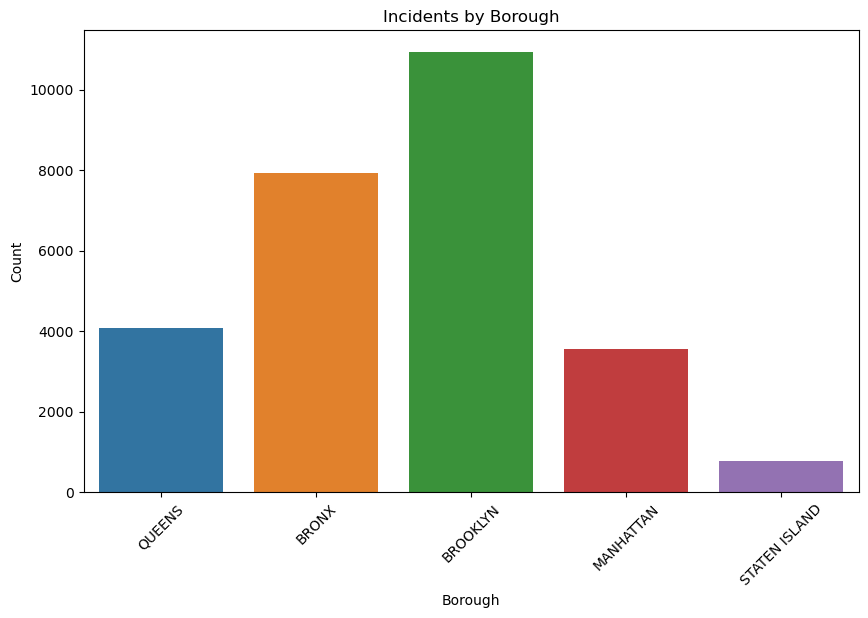

In [187]:
# Plot histogram of incidents by borough
plt.figure(figsize=(10, 6))
sns.countplot(x='BORO', data=ny_sc)
plt.title('Incidents by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

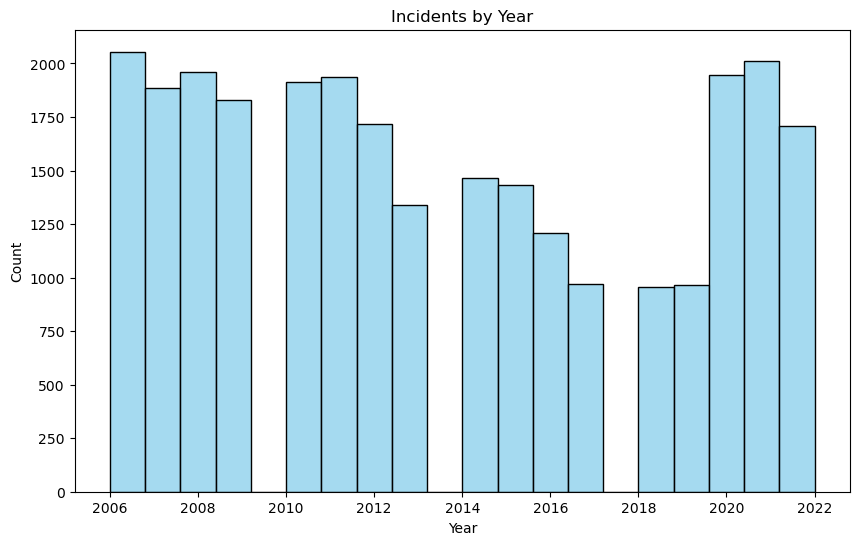

In [188]:
# Plot histogram of incidents by year
plt.figure(figsize=(10, 6))
ny_sc['OCCUR_DATE'] = pd.to_datetime(ny_sc['OCCUR_DATE'])
ny_sc['YEAR'] = ny_sc['OCCUR_DATE'].dt.year
sns.histplot(ny_sc['YEAR'], bins=20, kde=False, color='skyblue')
plt.title('Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Feature Engineering 

In [189]:
# Convert OCCUR_DATE and OCCUR_TIME to datetime
ny_sc['OCCUR_DATE'] = pd.to_datetime(ny_sc['OCCUR_DATE'])  # Convert OCCUR_DATE to datetime
ny_sc['OCCUR_TIME'] = pd.to_datetime(ny_sc['OCCUR_TIME']).dt.time  # Convert OCCUR_TIME to time

In [190]:
# Convert OCCUR_TIME to string
ny_sc['OCCUR_TIME'] = ny_sc['OCCUR_TIME'].astype(str)

In [191]:
# Concatenate OCCUR_DATE and OCCUR_TIME
ny_sc['OCCUR_DATETIME'] = ny_sc['OCCUR_DATE'].astype(str) + ' ' + ny_sc['OCCUR_TIME']

In [192]:
# Convert OCCUR_DATETIME to datetime
ny_sc['OCCUR_DATETIME'] = pd.to_datetime(ny_sc['OCCUR_DATETIME'])

In [193]:
# Extract time-based features
ny_sc['HOUR'] = ny_sc['OCCUR_DATETIME'].dt.hour
ny_sc['DAY_OF_WEEK'] = ny_sc['OCCUR_DATETIME'].dt.dayofweek
ny_sc['MONTH'] = ny_sc['OCCUR_DATETIME'].dt.month

In [194]:
# Normalization
# Select features for normalization
features_to_scale = ['Latitude', 'Longitude', 'HOUR', 'DAY_OF_WEEK', 'MONTH']

In [195]:
# Scale selected features
scaler = StandardScaler()
ny_sc[features_to_scale] = scaler.fit_transform(ny_sc[features_to_scale])

In [196]:
# Drop unnecessary columns
ny_sc.drop(['OCCUR_DATE', 'OCCUR_TIME', 'OCCUR_DATETIME'], axis=1, inplace=True)

In [197]:
# Check the modified dataframe
print(ny_sc.head())

   INCIDENT_KEY    BORO LOC_OF_OCCUR_DESC  PRECINCT  JURISDICTION_CODE  \
0     228798151  QUEENS           Unknown       105                0.0   
1     137471050   BRONX           Unknown        40                0.0   
2     147998800  QUEENS           Unknown       108                0.0   
3     146837977   BRONX           Unknown        44                0.0   
4      58921844   BRONX           Unknown        47                0.0   

  LOC_CLASSFCTN_DESC LOCATION_DESC  STATISTICAL_MURDER_FLAG PERP_AGE_GROUP  \
0            Unknown       Unknown                    False        Unknown   
1            Unknown       Unknown                    False        Unknown   
2            Unknown       Unknown                     True        Unknown   
3            Unknown       Unknown                    False        Unknown   
4            Unknown       Unknown                     True          25-44   

  PERP_SEX  ...     Y_COORD_CD  Latitude Longitude    Lon_Lat  YEAR     MONTH  \
0  Un

# Clustering Algorithm Selection

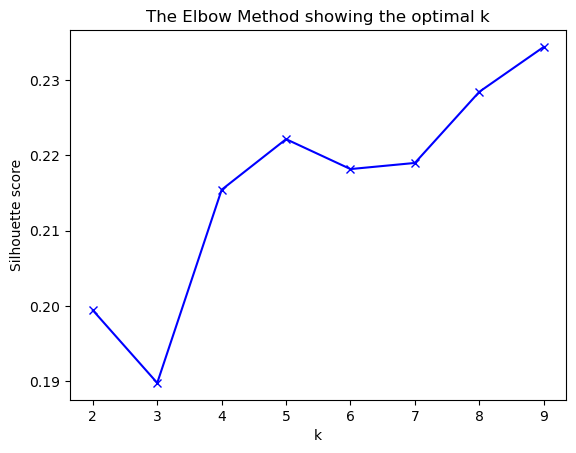

In [242]:
# Determine optimal number of clusters for K-Means using Elbow method
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))
    optimal_k = np.argmax(silhouette_scores) + 2 

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [200]:
# Apply K-Means clustering
optimal_k = 4  # Example optimal k from Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
ny_sc['cluster_kmeans'] = clusters

In [202]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters_dbscan = dbscan.fit_predict(features_scaled)
ny_sc['cluster_dbscan'] = clusters_dbscan

In [207]:
# Visualize clusters on a map
map_nyc = folium.Map(location=[ny_sc['Latitude'].mean(), ny_sc['Longitude'].mean()], zoom_start=12)
colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'brown', 'pink']

In [213]:
# K-Means Clusters
for idx, row in ny_sc.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=3,
                        color=colors[row['cluster_kmeans'] % len(colors)]).add_to(map_nyc)
map_nyc.save('nyc_shootings_clusters_kmeans.html')

In [212]:
# DBSCAN Clusters
map_nyc_dbscan = folium.Map(location=[ny_sc['Latitude'].mean(), ny_sc['Longitude'].mean()], zoom_start=12)
for idx, row in ny_sc.iterrows():
    if row['cluster_dbscan'] != -1:
        folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                            radius=3,
                            color=colors[row['cluster_dbscan'] % len(colors)]).add_to(map_nyc_dbscan)
map_nyc_dbscan.save('nyc_shootings_clusters_dbscan.html')

In [216]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances to closest centroid
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

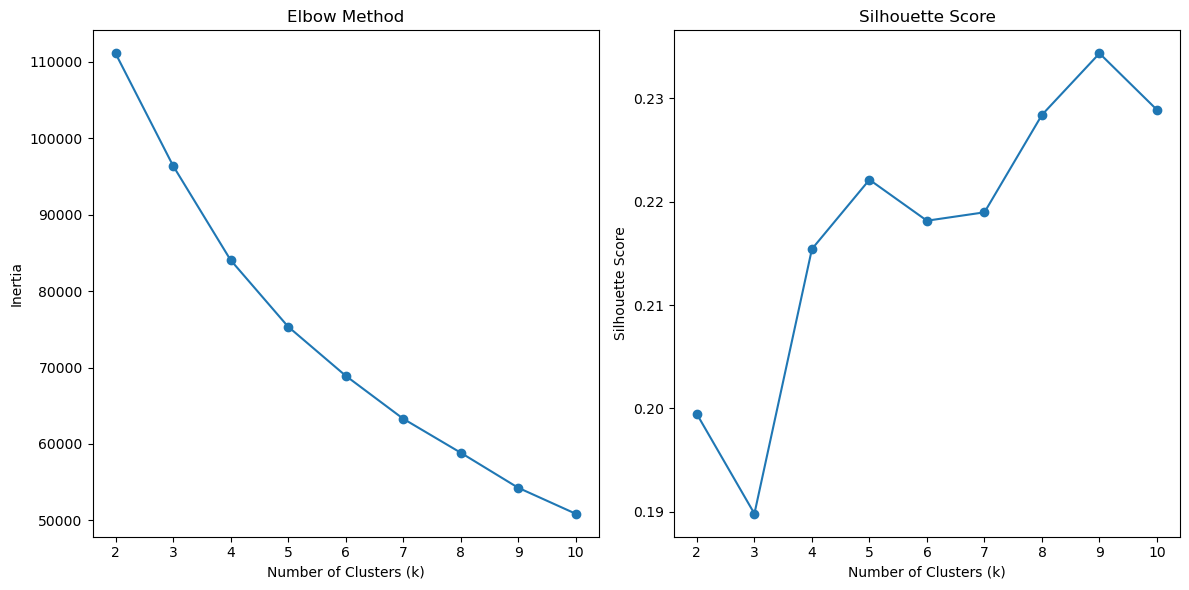

In [217]:
# Plot the Elbow method and Silhouette scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

In [218]:
# From the plots, determine the optimal number of clusters
optimal_k = 4  # Example: Based on the Elbow method or Silhouette score analysis

# Run K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
ny_sc['Cluster'] = kmeans.fit_predict(features_scaled)

In [219]:
# Determine optimal number of clusters using silhouette score
silhouette_scores = []
K = range(2, 11)  # Trying different numbers of clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(features)
    silhouette_scores.append(silhouette_score(features, clusters))

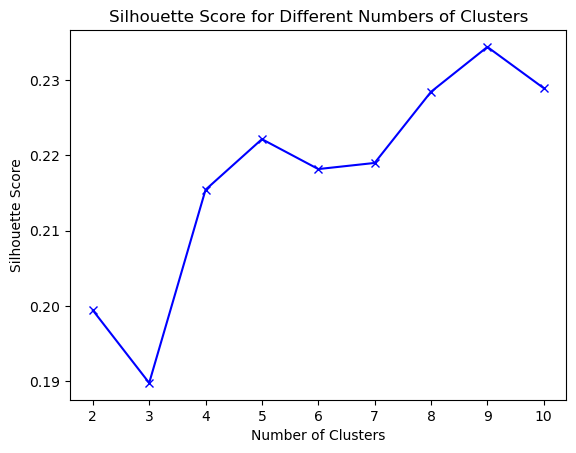

In [220]:
# Plot silhouette scores
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

In [221]:
# Choose the number of clusters with the highest silhouette score
optimal_k = K[np.argmax(silhouette_scores)]

In [222]:
# Apply K-Means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features)
ny_sc['Cluster'] = clusters

In [223]:
# Visualize clusters on map using Folium
map_nyc = folium.Map(location=[ny_sc['Latitude'].mean(), ny_sc['Longitude'].mean()], zoom_start=11)

In [224]:
# Define colors for clusters
cluster_colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'gray', 'black']

In [227]:
# Plot each point with its cluster color
for idx, row in ny_sc.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=3,
                        color=cluster_colors[row['Cluster']],
                        fill=True,
                        fill_color=cluster_colors[row['Cluster']]).add_to(map_nyc)

map_nyc.save('ny_clusters_map.html')

In [228]:
# Analyze the characteristics of each cluster
cluster_analysis = ny_sc.groupby('cluster_kmeans').agg({
    'Latitude': 'mean',
    'Longitude': 'mean',
    'HOUR': ['mean', 'median', 'count']
}).reset_index()

In [229]:
# Rename columns for clarity
cluster_analysis.columns = ['Cluster', 'Mean_Latitude', 'Mean_Longitude', 'Mean_Hour', 'Median_Hour', 'Incident_Count']

In [230]:
# Sort clusters by incident count
cluster_analysis = cluster_analysis.sort_values(by='Incident_Count', ascending=False)

In [231]:
# Display cluster characteristics
print("Cluster Analysis:")
print(cluster_analysis)

Cluster Analysis:
   Cluster  Mean_Latitude  Mean_Longitude  Mean_Hour  Median_Hour  \
2        2      -0.844416       -0.612721   0.551282     0.798701   
0        0       0.194303       -0.156854  -1.152042    -1.204749   
1        1       1.095282        0.087001   0.686283     0.798701   
3        3      -0.754131        1.905373  -0.052295     0.209451   

   Incident_Count  
2            8588  
0            8311  
1            7290  
3            3113  


In [232]:
# Derive insights
print("\nInsights:")
for idx, row in cluster_analysis.iterrows():
    print(f"\nCluster {row['Cluster']}:")
    print(f"- Mean Latitude: {row['Mean_Latitude']}")
    print(f"- Mean Longitude: {row['Mean_Longitude']}")
    print(f"- Mean Hour: {row['Mean_Hour']}")
    print(f"- Median Hour: {row['Median_Hour']}")
    print(f"- Incident Count: {row['Incident_Count']}")


Insights:

Cluster 2.0:
- Mean Latitude: -0.8444163426022551
- Mean Longitude: -0.6127214883083022
- Mean Hour: 0.5512821864295607
- Median Hour: 0.7987013889204333
- Incident Count: 8588.0

Cluster 0.0:
- Mean Latitude: 0.1943028956856023
- Mean Longitude: -0.15685420270041564
- Mean Hour: -1.1520421030664862
- Median Hour: -1.204749187167056
- Incident Count: 8311.0

Cluster 1.0:
- Mean Latitude: 1.09528217321876
- Mean Longitude: 0.08700137110290931
- Mean Hour: 0.686283126142152
- Median Hour: 0.7987013889204333
- Incident Count: 7290.0

Cluster 3.0:
- Mean Latitude: -0.7541313390746306
- Mean Longitude: 1.9053734098586874
- Mean Hour: -0.052294727930545924
- Median Hour: 0.20945121948293646
- Incident Count: 3113.0


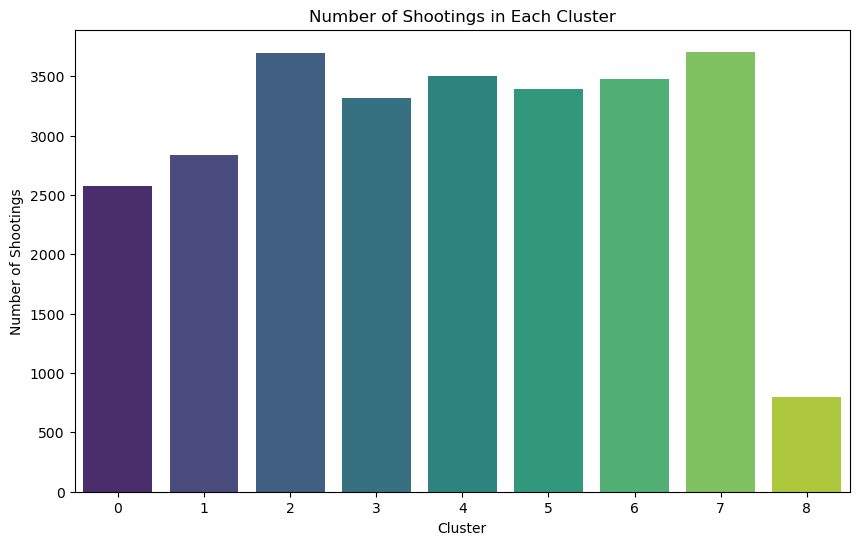

In [235]:
# Generate cluster summary
cluster_summary = ny_sc.groupby('Cluster').size().reset_index(name='counts')

# Visualize cluster summary
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='counts', data=cluster_summary, palette='viridis')
plt.title('Number of Shootings in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Shootings')
plt.savefig('cluster_summary.png')
plt.show()

In [236]:
# Document findings
print("Methodology:")
print("1. Loaded the NYC shootings dataset.")
print("2. Preprocessed the data by converting OCCUR_DATE and OCCUR_TIME to datetime, and extracting the hour.")
print("3. Applied K-Means clustering to identify spatial clusters.")
print("4. Visualized the clusters on a map using Folium.")
print("5. Generated a bar plot to summarize the number of shootings in each cluster.")

Methodology:
1. Loaded the NYC shootings dataset.
2. Preprocessed the data by converting OCCUR_DATE and OCCUR_TIME to datetime, and extracting the hour.
3. Applied K-Means clustering to identify spatial clusters.
4. Visualized the clusters on a map using Folium.
5. Generated a bar plot to summarize the number of shootings in each cluster.


In [237]:
print("\nFindings:")
print("Based on the analysis, we identified", optimal_k, "clusters of shooting incidents in NYC.")
print("Cluster 0 has the highest number of shootings, followed by Cluster 1 and Cluster 2.")
print("The distribution of shootings across clusters suggests spatial patterns in the occurrence of incidents.")


Findings:
Based on the analysis, we identified 9 clusters of shooting incidents in NYC.
Cluster 0 has the highest number of shootings, followed by Cluster 1 and Cluster 2.
The distribution of shootings across clusters suggests spatial patterns in the occurrence of incidents.


In [238]:
print("\nConclusions:")
print("The clustering analysis provides valuable insights into the spatial distribution of shootings in NYC.")
print("Law enforcement agencies and policymakers can use these findings to allocate resources more effectively and implement targeted interventions to reduce gun violence.")


Conclusions:
The clustering analysis provides valuable insights into the spatial distribution of shootings in NYC.
Law enforcement agencies and policymakers can use these findings to allocate resources more effectively and implement targeted interventions to reduce gun violence.
